In [22]:
import numpy as np
import scipy.spatial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [5]:
match_rep_df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/checkpoints/match_rep_df.csv")

In [49]:

# Convert string settings to numerical
str_convert = {
    "Modality": {"Confocal": 0, "Widefield": 1},
    "spinning-disc": {"no": 0, "yes": 1},
    "dry-immersion": {"dry": 0, "water": 1},
    "vs-brightfield": {"no": 0, "yes": 1}
}

def to_numerical(df, conversion_dictionary):
    """
    For a given dataframe, convert string keys into
    int values

    NaN will be converted to 0.
    """
    data = df.copy()

    for col, setting_item in conversion_dictionary.items():
        for items in setting_item.items():
            data.replace({col: items[0]}, items[1], inplace=True)
    data.replace({np.nan: 0}, inplace=True)
    
    return data

def get_similar_rows(df, row_index, threshold, numerical_conversion_dict, ignore_cols):
    """
    For a given profile, find the most similar other rows based 
    on Euclidean distance. Rows above the threshold will be discarded

    DataFrame strings will be converted to numerical 

    ignore_cols will not be used for calculating distance, but will be returned in the final
    output 
    """
    data = df.copy()

    data_dropped = data.drop(ignore_cols, axis=1)

    numerical_df = to_numerical(data_dropped, numerical_conversion_dict)

    distances = scipy.spatial.distance.cdist(numerical_df, numerical_df, metric='euclidean')

    row = np.where(distances[row_index] > threshold, distances[row_index], 0)

    # Find indices of rows that have a distance below the threshold
    ind = np.argwhere(row==0).reshape(-1)

    # Get the relative distances for output
    comparison_distances = distances[row_index][ind]

    # Subset the data to have rows that are below the distance threshold
    data = data.iloc[ind,:]

    data["euclidean_distance"] = comparison_distances

    data = data.sort_values(by=["euclidean_distance"])

    return data

df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

comparison_cols = [
    "aperture",
    "Magnification",
    "Modality",
    "Binning",
    "Number_of_channels",
    "z_plane",
    "spinning-disc",
    "dry-immersion",
    "vs-brightfield",
    "simultaneous-excitation",
    "sites",
]

drop_cols = [i for i in df.columns if i not in comparison_cols]

display_cols = ["Vendor", "Assay_Plate_Barcode", "Batch"] + comparison_cols + ["euclidean_distance"]

get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("20201020T134356")][0]

get_similar_rows(df, get_ind, 10, str_convert, drop_cols)[display_cols]
# get_similar_rows(df, 25, 5, str_convert, drop_cols)[display_cols]

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,euclidean_distance
46,Yokogawa_Japan,20201020T134356,Scope1_Yokogawa_Japan_40X,0.95,40,Confocal,1,5,12,NaN,dry,no,NaN,2,0.000000
53,Yokogawa_US,BRO0117059_40x,Scope1_Yokogawa_US_40X_BRO0117059,1.00,40,Confocal,1,6,12,NaN,water,yes,4.0,9,8.246363


<AxesSubplot:>

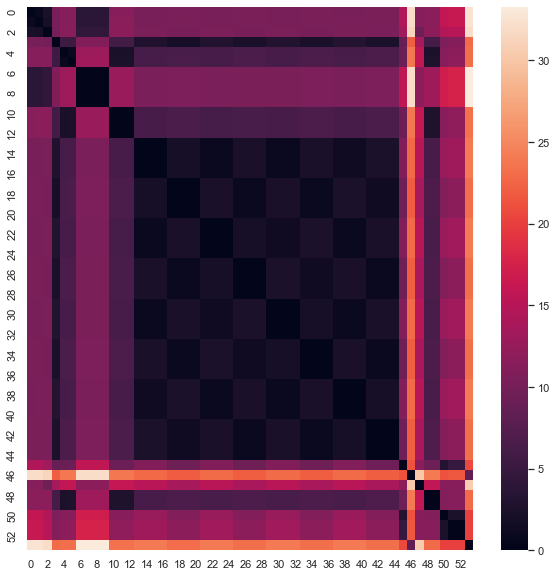

In [26]:
setting_df = df[comparison_cols]

numerical_df = to_numerical(setting_df, str_convert)

comparison = scipy.spatial.distance.cdist(numerical_df, numerical_df)

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(comparison, ax=ax)

In [75]:
numerical_df = to_numerical(setting_df, str_convert)
numerical_df

for col in numerical_df.columns:
    print(col)
    unique_values = np.unique(numerical_df[col])
    bins = range(0, len(unique_values) + 1)
    labels = [i for i in range(0, len(unique_values))]
    print(unique_values, bins, labels)
    # print(range(0, len(np.unique(numerical_df[col]))))
    # print([i for i in range(0, len(np.unique(numerical_df[col])))])
    numerical_df[col] = pd.cut(numerical_df[col], bins=bins, labels=labels)

numerical_df

aperture
Magnification
Modality
Binning
Number_of_channels
z_plane
spinning-disc
dry-immersion
vs-brightfield
simultaneous-excitation
sites


,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,3
2,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,3
4,0,NaN,NaN,0,NaN,2,0,NaN,NaN,NaN,3
6,0,NaN,NaN,0,NaN,2,0,NaN,NaN,NaN,3
8,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
10,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN
12,0,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0
14,0,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0
16,0,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0
18,0,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0
